<a href="https://colab.research.google.com/github/schoenml/constellate-class-tdm-notebooks/blob/master/Bootcamp_basictext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Text Analysis Basics 

In this lesson, we'll go through some of the basic steps of reading text files and analyzing them with Python. 

* In the introductory part, you'll use simple methods to preprocess a text by cleaning out volume and chapter headers. 

* In the first part, you'll use very basic tools and methods to scan a text file and count its words.

* In the second part, you'll use tools included in Python's Natural Language ToolKit (NLTK) to do the same thing a little more efficienty. 

* In the third part, you'll graph the top 10 words in a text of your choice using either of these methods. 



# Before you start: 
## Project Gutenberg and workshop files download 

Before you get started, go to the Project Gutenberg website (https://www.gutenberg.org/) and search for a text you'd like to analyze in the third part of this tutorial.

Once you find your text, click on the title and see the download format options. Download your selected text in **plain-text format with utf-8 encoding**.

The easiest way to do this is to right-click or Control+click on the Plain Text UTF-8 link, select 'save link as', and save the txt file to your hard drive with a title you can remember. 

Download the txt files from the workshop folder in Brightspace, as well, and have them handy on your desktop.

# Basic setup: 
## Import necessary packages, read text files and clean them for analysis

First of all, we'll import a number of special Python packages for use in this tutorial.

In [1]:
# pyplot, from the package matplotlib, can be used to create a simple bar graph
# Here we import pyplot and also rename it 'plt', which is faster to type.

import matplotlib.pyplot as plt 

In [2]:
# 'Pretty print,' or 'pprint,' is a variation of the print function. 
# Pprint adds spacing and formatting to complex data structures 
# so they're easier for humans to read.

from pprint import pprint 

In [3]:
# We'll also import the Natural Language ToolKit, nltk, which we'll use
# later in this tutorial.

import nltk

# 'punkt' is an nltk dependency that may need to be downloaded separately in Colab
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Finally, import the 'string' package - among other things, this provides a 
# built-in punctuation list we'll use in the second part of this tutorial.

import string  

## Read a file into your python environment 3 ways

For this section, we'll work with a previously file downloaded from Project Gutenberg, Jane Austen's *Pride and Prejudice.* 

Compare three ways of opening reading the contents of this text file into your own Python environment:

**1. read()**

In [6]:
# First, upload the file you want to work with. In this case, we'll use
# the file Austen_pride.txt - this is a slightly cleaned-up version 
# of Jane Austen's Pride and Prejudice from Project Gutenberg.

from google.colab import files

uploaded = files.upload()

Saving Austen_pride.txt to Austen_pride.txt


In [8]:
# First read the file using the read() method. 
# read() returns all the file text as one long string. 

# In the first line, you open the file and specify that you will be reading it only ('r'). 
# You also create a shorthand, 'f' to refer to it for the rest of this code block.

with open('Austen_pride.txt', 'r') as f: 
  Austen_pride_str = f.read()

print(Austen_pride_str[:10]) # Examine the first 300 characters of the string this code returns.


VOL. I.
CH


**2. readlines()**

In [9]:
# Next, use the readlines() method and examine the first two lines.

with open('Austen_pride.txt', 'r') as f:
  Austen_pride_lines = f.readlines() 
  
pprint(Austen_pride_lines[:10])


['VOL. I.\n',
 'CHAPTER I.\n',
 '\n',
 '\n',
 'It is a truth universally acknowledged, that a single man in possession\n',
 'of a good fortune, must be in want of a wife.\n',
 '\n',
 'However little known the feelings or views of such a man may be on his\n',
 'first entering a neighbourhood, this truth is so well fixed in the minds\n',
 'of the surrounding families, that he is considered as the rightful\n']


**3. readlines() + strip()**

In [11]:
# In the above example, you see a lot of this: /n. This is a newline markup character.
# Here's one way to strip such formatting markup and whitespace out of your text from the start. We'll continue working with lines of text for now.

Austen_pride = [] # create an empty list for the cleaned lines of text
with open('Austen_pride.txt', 'r') as f:
  for line in f.readlines(): # iterate through the list returned by readlines()
    Austen_pride.append(line.strip()) # add each line to the new list, with the newline characters stripped from the right side (rstrip())
    
pprint(Austen_pride[:100]) # notice that this version is a little cleaner

['VOL. I.',
 'CHAPTER I.',
 '',
 '',
 'It is a truth universally acknowledged, that a single man in possession',
 'of a good fortune, must be in want of a wife.',
 '',
 'However little known the feelings or views of such a man may be on his',
 'first entering a neighbourhood, this truth is so well fixed in the minds',
 'of the surrounding families, that he is considered as the rightful',
 'property of some one or other of their daughters.',
 '',
 '"My dear Mr. Bennet," said his lady to him one day, "have you heard that',
 'Netherfield Park is let at last?"',
 '',
 'Mr. Bennet replied that he had not.',
 '',
 '"But it is," returned she; "for Mrs. Long has just been here, and she',
 'told me all about it."',
 '',
 'Mr. Bennet made no answer.',
 '',
 '"Do not you want to know who has taken it?" cried his wife impatiently.',
 '',
 '"_You_ want to tell me, and I have no objection to hearing it."',
 '',
 'This was invitation enough.',
 '',
 '"Why, my dear, you must know, Mrs. Long says that 

We'll work with the third version here, Austen_pride.



Once you have the text in a fairly clean format, explore it to see what you have to work with. What other kinds of 'noise' might be in this document, and what kinds of cleaning do you have to do so you can focus on only the most salient words and analyze them accurately?

# Preprocessing
## Exploring and cleaning up your text 

Computational text analysis involves a lot of *pre-processing* before you even get to the analysis part. 

The motivation behind cleaning texts is to be sure any features that make it into your analysis really are part of the text you think you're analyzing. Most text files include other kinds of langauge as well, whether that's header material, publisher information, tables of contents or chapter headings, illustrations, or something else. 

You may occasionally want to include some of this additional material in your analysis. It all depends on the kinds of questions you want to ask of the text. 

This means that a lot of text preprocessing needs to be decided on a case-by-case or study-by-study basis. The most important thing is to be clear and consistent about your preprocessing decisions.

In this example, we're going to strip out the text's volume and chapter headers, so they aren't inclued in our eventual word count.

In [12]:
# pretty print the first 20 lines of this text
pprint(Austen_pride[:20])

['VOL. I.',
 'CHAPTER I.',
 '',
 '',
 'It is a truth universally acknowledged, that a single man in possession',
 'of a good fortune, must be in want of a wife.',
 '',
 'However little known the feelings or views of such a man may be on his',
 'first entering a neighbourhood, this truth is so well fixed in the minds',
 'of the surrounding families, that he is considered as the rightful',
 'property of some one or other of their daughters.',
 '',
 '"My dear Mr. Bennet," said his lady to him one day, "have you heard that',
 'Netherfield Park is let at last?"',
 '',
 'Mr. Bennet replied that he had not.',
 '',
 '"But it is," returned she; "for Mrs. Long has just been here, and she',
 'told me all about it."',
 '']


When we look at these first 20 lines of this text, we get a sense of the strucutre and format of the novel overall: we see that it's separated into volumes, and we see the format for introducing volumes: "VOL. I.", in all caps, with roman numerals. We also see that this novel is broken up into chapters, and we see the format for introducing new chapters: "CHAPTER I."  


In [13]:
# Let's see what more we can lean about the volume and chapter structure of this book: 
for line in Austen_pride:
  if 'VOL' in line:
    print(line)
  if 'CHAPTER' in line: 
    print(line)

VOL. I.
CHAPTER I.
CHAPTER II.
CHAPTER III.
CHAPTER IV.
CHAPTER V.
CHAPTER VI.
CHAPTER VII.
CHAPTER VIII.
CHAPTER IX.
CHAPTER X.
CHAPTER XI.
CHAPTER XII.
CHAPTER XIII.
CHAPTER XIV.
CHAPTER XV.
CHAPTER XVI.
CHAPTER XVII.
CHAPTER XVIII.
CHAPTER XIX.
CHAPTER XX.
CHAPTER XXI.
CHAPTER XXII.
CHAPTER XXIII.
VOL. II.
CHAPTER I.
CHAPTER II.
CHAPTER III.
CHAPTER IV.
CHAPTER V.
CHAPTER VI.
CHAPTER VII.
CHAPTER VIII.
CHAPTER IX.
CHAPTER X.
CHAPTER XI.
CHAPTER XII.
CHAPTER XIII.
CHAPTER XIV.
CHAPTER XV.
CHAPTER XVI.
CHAPTER XVII.
CHAPTER XVIII.
CHAPTER XIX.
VOL. III.
CHAPTER I.
CHAPTER II.
CHAPTER III.
CHAPTER IV.
CHAPTER V.
CHAPTER VI.
CHAPTER VII.
CHAPTER VIII.
CHAPTER IX.
CHAPTER X.
CHAPTER XI.
CHAPTER XII.
CHAPTER XIII.
CHAPTER XIV.
CHAPTER XV.
CHAPTER XVI.
CHAPTER XVII.
CHAPTER XVIII.
CHAPTER XIX.


In [14]:
# From the above map of this text, we see that the chapters in different volumes have identical names
# Here's an easy way to remove any line that includes volume or chapter headers.

for line in Austen_pride:
  if 'VOL' in line:
    Austen_pride.remove(line)
  elif 'CHAPTER' in line: # "elif" is a contraction of "else if" - a secondary conditional
    Austen_pride.remove(line)
  else: continue

In [15]:
# Let's see what the start of this text looks like now:

pprint(Austen_pride[:20])

['',
 '',
 'It is a truth universally acknowledged, that a single man in possession',
 'of a good fortune, must be in want of a wife.',
 '',
 'However little known the feelings or views of such a man may be on his',
 'first entering a neighbourhood, this truth is so well fixed in the minds',
 'of the surrounding families, that he is considered as the rightful',
 'property of some one or other of their daughters.',
 '',
 '"My dear Mr. Bennet," said his lady to him one day, "have you heard that',
 'Netherfield Park is let at last?"',
 '',
 'Mr. Bennet replied that he had not.',
 '',
 '"But it is," returned she; "for Mrs. Long has just been here, and she',
 'told me all about it."',
 '',
 'Mr. Bennet made no answer.',
 '']


Just to be tidy, let's get ride of those blank lines...

In [16]:
for line in Austen_pride:
  if len(line) <1:
    Austen_pride.remove(line)

In [ ]:
pprint(Austen_pride[:10])

['It is a truth universally acknowledged, that a single man in possession',
 'of a good fortune, must be in want of a wife.',
 'However little known the feelings or views of such a man may be on his',
 'first entering a neighbourhood, this truth is so well fixed in the minds',
 'of the surrounding families, that he is considered as the rightful',
 'property of some one or other of their daughters.',
 '"My dear Mr. Bennet," said his lady to him one day, "have you heard that',
 'Netherfield Park is let at last?"',
 'Mr. Bennet replied that he had not.',
 '"But it is," returned she; "for Mrs. Long has just been here, and she']


# Text Analysis Part I


## Tokens

What we've made so far is a cleaned up version of Austen's novel, stored in Python as a list of lines imported from the initial txt file. 

What we *want* for a word count analysis is a list of words.

We'll use two specialized string methods, 
string.join() and string.split() 
to recombine this text and split it into individual words, or 'tokens'.

In [ ]:
# The string.join() method fuses together a collection of text strings.
# To use this method, first tell Python what to put in between the strings
# In this case, we're using ' ', or a single blank space. 
# Put this separator in quotes, then add .join()
# Inside the parentheses, provide the name of the list you want to join- 
# - in this case, the list of strings that is our text.

Austen_pride = ' '.join(Austen_pride) 

# Printing the data type of this variable confirms 
# that we've successfully converted Austen_pride from a list to one long string.
print(type(Austen_pride)) 

<class 'str'>


In [ ]:
# We can now re-separate this long string into a list of individual words by splitting the string on whitespace. 
# Here we pass the single space, ' ', inside the parentheses as the argument of this method.
# Before the period, name the long string you want to split up - in this case, Austen_pride.

#When we split the text into individual parts like this, we describe the parts as 'tokens'. (As we'll see below, tokens may not always be words.)

Austen_tokens = Austen_pride.split(' ') # Split the long string into a list of parts by dividing on whitespace) 
print(Austen_tokens[:10]) # print the first ten tokens in the list of tokens we just made.

['It', 'is', 'a', 'truth', 'universally', 'acknowledged,', 'that', 'a', 'single', 'man']


In [ ]:
# To better prepare this list for quantitative analysis, we'll also remove punctuation and whitespace.
# Many Python libraries include punctuation lists, but here we'll write our own.
# We'll also recast all the words in this list as lower case, using the string.lower() method.

punct = [',', '.', ';', "'", '"', '!', '(', ')', ':', '?', '*', ' ', '_'] # use a list of common punctuation you'd like to strip out
clean_Austen_tokens = [] # create an empty list for the cleaned-up tokens
for token in Austen_tokens: # loop through the list of tokens
  for mark in punct: # look at each mark in the list 'punct'
    while True: # We use a 'while' loop here to ensure that this process will continue until all punctuation is removed
      if mark in token:
        token = token.replace(mark, '') # remove any punctuation
        continue # This repeats the loop to look for additional punctuation in each token
      else: break  # When no punctuation remains, this loop ends
  clean_Austen_tokens.append(token.lower()) # Now that the token is cleared of punctuation, we can add it to the clean_Austen_tokens list

print(clean_Austen_tokens[0:10]) # print to verify this has worked as expected
 

['it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man']


## Run a simple word count for this full document - 2 ways

### 1. Building a simple counter

In [ ]:
# Now let's count some words.
# One very simple way to do this is to create a counter variable and set its initial value to 0,
# then add 1 each time we find another iteration of our word.

counter = 0

for word in clean_Austen_tokens:
  if word == 'she':
    counter += 1  # This notation 'counter +=' is shorthand for 'counter = counter + 1' adding 1 to the value of the counter

print('The word \'she\' appears ' +str(counter) + ' times in this text.')


The word 'she' appears 1694 times in this text.


### Building a dictionary of word counts

In [ ]:
# To count *all* the words in this document, we can use a dictionary.
# Recall that a Python dictionary stores data in key-value pairs; 
# We'll enter each word as a key; the corresponding value will be the word count.

Austen_words_dict = {} # start with an empty dictionary
for word in clean_Austen_tokens:
  if len(word) >=1: # skip any blank tokens 
    if word in Austen_words_dict.keys(): # if the word already exists as a key in our dictionary-
      Austen_words_dict[word] += 1         #  -we'll add 1 to its assigned value.      
    else:
      Austen_words_dict[word] = 1 # if the word isn't in the dictionary, we'll add it as a key with the initial value of 1

In [ ]:
# Search for a word in the dictionary of word counts: 
# Use the dictionary.get() method below - 
# the first item in parentheses is the key you want to find; 
# the second item tells Python what to print if your key isn't found.

Austen_words_dict.get('he', 'not found')


1321

In [ ]:
# The word count dictionary is versatile.
# Here, use the input() function to search for a few more word counts

search_word = input('What word would you like to count? ')
print('The count for that word is:', Austen_words_dict.get(search_word, 'zero'))

What word would you like to count? there
The count for that word is: 347


In [ ]:
# To find the most frequently- and infrequently-occurring words in this document, 
# we can make a list of all dictionary items and sort them by value. 

frequent_words = [] # make an empty list to receive the items in this dictionary.

for key, value in Austen_words_dict.items(): 
  frequent_words.append((value, key)) # Iterate through the dictionary and add the keys and values to our new list.
                                      # Note that we're adding the value first here, so we can easily sort on this number in the next step.

            # In the code above, note that we put parentheses around (key, value) to indicate that this pair should be handled as one unit. 
            # If you're interested, this is a particular Python data type called a 'tuple'. 

# Here we use sorted() to sort the list we just made. 
# We sort the list in reverse order, so the largest numbers come first. 
                                            
frequent_words = sorted(frequent_words, reverse = True)  

print(frequent_words[:10]) # Here are the top ten words

[(4319, 'the'), (4123, 'to'), (3615, 'of'), (3513, 'and'), (2210, 'her'), (2011, 'i'), (1921, 'a'), (1865, 'in'), (1845, 'was'), (1694, 'she')]


## Filter stopwords and  display 10 most common words in text

### Stopwords 

Unsurprisingly, the most frequently occurring words in this text are rather uninteresting functional words like 'the', 'to', 'of', etc. In text analysis, these are called "stopwords" - sometimes we want to include them in an analysis, and sometimes we don't. 

If you want to filter out stopwords, here's one way to do it:

In [ ]:
# Many Python libraries include stopwords lists, but for the moment we'll import one from a txt file
# Run the Colab upload code, and upload the file engl_stopwords:

uploaded = files.upload()

Saving engl_stopwords.txt to engl_stopwords.txt


In [ ]:
with open('engl_stopwords.txt', 'r') as f:  
  english_stopwords = f.read()  # Recall that file.read() imports the text as one long string.
english_stopwords = english_stopwords.split(', ') # create a list of words from the long document string by spitting on ', ' (comma and space)
pprint(english_stopwords) # pretty-print the stopwords list to see what's included.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [ ]:
# Here we'll create a new Pride & Prejudice dictionary that excludes words from the stopwords list

Austen_words_filtered = {} 
for k, v in Austen_words_dict.items(): # Iterate though each key-value pair  
  if k not in english_stopwords: # Ensure that the key is not a stopword
    Austen_words_filtered[k] = v # Set the key and value as items in the new dictionary

# Again, here we create a list of dictionary items and sort them in reverse order to get the largest values first

word_count = []
for (key,value) in Austen_words_filtered.items():
  word_count.append((value, key)) 

sorted_count = sorted(word_count, reverse = True) 

In [ ]:
pprint(sorted_count[:10])

[(772, 'mr'),
 (585, 'elizabeth'),
 (522, 'could'),
 (467, 'would'),
 (396, 'said'),
 (365, 'darcy'),
 (342, 'mrs'),
 (328, 'much'),
 (308, 'must'),
 (292, 'bennet')]


### Create a simple chart of 10 most common words

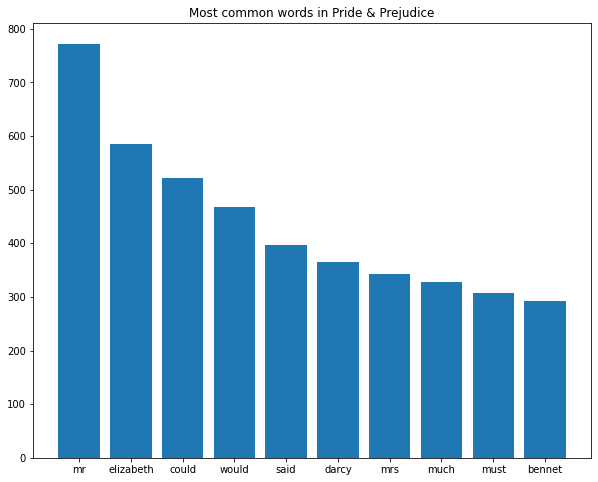

In [ ]:
# Now that we've found our 10 most frequent words, 
# let's create a simple bar chart to compare them:

x = [] # list of values for the x-axis - 
y = [] # list of values for the y-axis
for (v, k) in sorted_count[:10]:
  x.append(k)
  y.append(v)
plt.figure(figsize=(10,8))
plt.bar(x, y)
plt.title('Most common words in Pride & Prejudice')
plt.show()

# Text Analysis Part II: Working with NLTK

In the previous section, we used fairly simple computational methods to read, clean, tokenize, filter, and plot the words in this text. 

As it happens, Python has an entire mini-universe of libraries, packages, and tools for natural langauge processing (NLP). It's called **NLTK**, which stands for Natural Language ToolKit, and it can expedite everything we just did.




We'll start the NLTK exploration with another Austen text. Let's check out the structure, clean some chapter headings, and recast the lines as a string before we proceed.

In [ ]:
# First, upload the file Austen_emma.txt:

uploaded = files.upload()

Saving Austen_emma.txt to Austen_emma.txt


In [ ]:
with open('Austen_emma.txt', 'r') as f:
  Austen_emma = []
  for line in f.readlines():
    Austen_emma.append(line.strip())
  
pprint(Austen_emma[:10])

['VOLUME I',
 '',
 '',
 '',
 'CHAPTER I',
 '',
 '',
 'Emma Woodhouse, handsome, clever, and rich, with a comfortable home',
 'and happy disposition, seemed to unite some of the best blessings of',
 'existence; and had lived nearly twenty-one years in the world with very']


In [ ]:
# Again, let's see what's up with the Volume and Chapter headers:

for line in Austen_emma:
  if 'VOL' in line:
    print(line)
  if 'CHAPTER' in line:
    print(line)

VOLUME I
CHAPTER I
CHAPTER II
CHAPTER III
CHAPTER IV
CHAPTER V
CHAPTER VI
CHAPTER VII
CHAPTER VIII
CHAPTER IX
CHAPTER X
CHAPTER XI
CHAPTER XII
CHAPTER XIII
CHAPTER XIV
CHAPTER XV
CHAPTER XVI
CHAPTER XVII
CHAPTER XVIII
VOLUME II
CHAPTER I
CHAPTER II
CHAPTER III
CHAPTER IV
CHAPTER V
CHAPTER VI
CHAPTER VII
CHAPTER VIII
CHAPTER IX
CHAPTER X
CHAPTER XI
CHAPTER XII
CHAPTER XIII
CHAPTER XIV
CHAPTER XV
CHAPTER XVI
CHAPTER XVII
CHAPTER XVIII
VOLUME III
CHAPTER I
CHAPTER II
CHAPTER III
CHAPTER IV
CHAPTER V
CHAPTER VI
CHAPTER VII
CHAPTER VIII
CHAPTER IX
CHAPTER X
CHAPTER XI
CHAPTER XII
CHAPTER XIII
CHAPTER XIV
CHAPTER XV
CHAPTER XVI
CHAPTER XVII
CHAPTER XVIII
CHAPTER XIX


In [ ]:
# And, again, let's remove those headers from our text:
for line in Austen_emma:
  if 'VOL' in line:
    Austen_emma.remove(line)
  if 'CHAPTER' in line:
    Austen_emma.remove(line)
  if len(line) < 1:
    Austen_emma.remove(line)

In [ ]:
pprint(Austen_emma[:10])

['Emma Woodhouse, handsome, clever, and rich, with a comfortable home',
 'and happy disposition, seemed to unite some of the best blessings of',
 'existence; and had lived nearly twenty-one years in the world with very',
 'little to distress or vex her.',
 'She was the youngest of the two daughters of a most affectionate,',
 "indulgent father; and had, in consequence of her sister's marriage, been",
 'mistress of his house from a very early period. Her mother had died',
 'too long ago for her to have more than an indistinct remembrance of',
 'her caresses; and her place had been supplied by an excellent woman as',
 'governess, who had fallen little short of a mother in affection.']


In [ ]:
# Again, we'll use string.join() to convert these lines into one long string: 
Austen_emma = ' '.join(Austen_emma) 
print(Austen_emma[0:10]) # see the first 10 characters of this string, to ensure this worked as expected

Emma Woodh


Before we continue to  NLTK methods, be sure you've imported NLTK to your Python environment.

In [ ]:
## We ran this code above, but here's where it comes into play.

import nltk # Import NLTK
nltk.download('punkt') # This is a dependency that may need to be downloaded separately in Colab

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Tokenize with NLTK

NLTK offers multiple ways to tokenize a text. Here are a few examples. Try them out and see how they work. 

In [ ]:
Austen_emma_tokens = [] 

# Here we use the nltk.tokenize() method, which separates words:

emma_tokens = nltk.word_tokenize(Austen_emma) # call the nltk.wordpunct_tokenize() method on our text
for token in emma_tokens: # iterate through the list of tokens
  Austen_emma_tokens.append(token.lower()) # add an all-lower-case version of the token to our new list, Austen_tokens_1

print(Austen_emma_tokens[:5]) # See how this worked

['emma', 'woodhouse', ',', 'handsome', ',']


In [ ]:
# There's also a method to separate sentences 
# according to nltk's best guess about where sentences begin and end.
# See what nltk.sent_tokenize() does.

emma_tokens_version_2 = []
for token in nltk.sent_tokenize(Austen_emma):
  emma_tokens_version_2.append(token.lower())
pprint(emma_tokens_version_2[:5])

['emma woodhouse, handsome, clever, and rich, with a comfortable home and '
 'happy disposition, seemed to unite some of the best blessings of existence; '
 'and had lived nearly twenty-one years in the world with very little to '
 'distress or vex her.',
 'she was the youngest of the two daughters of a most affectionate, indulgent '
 "father; and had, in consequence of her sister's marriage, been mistress of "
 'his house from a very early period.',
 'her mother had died too long ago for her to have more than an indistinct '
 'remembrance of her caresses; and her place had been supplied by an excellent '
 'woman as governess, who had fallen little short of a mother in affection.',
 "sixteen years had miss taylor been in mr. woodhouse's family, less as a "
 'governess than a friend, very fond of both daughters, but particularly of '
 'emma.',
 'between _them_ it was more the intimacy of sisters.']


For now, let's continue working with the word_tokenize() version, Austen_emma_tokens. 



## Stopwords in NLTK

NLTK includes a built-in library of stopwords lists. We can easily access this to get an English stopwords filter. 

In [ ]:
nltk.download('stopwords') # Ensure that we have access to the lists of stopwords

stopword_list = nltk.corpus.stopwords.words('english') # This method is associated with the 'corpus' package in NLTK - a package of tools for working with large bodies of text
print(stopword_list[:10]) # Let's see what some of these stopwords are...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# Python also includes a built-in list of common punctuation marks that we can add to our stopwords list:

import string # import this package to get access to the punctuation list

In [ ]:
print(string.punctuation) # see what this collection of punctuation marks looks like

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# Once you've defined your list of stopwords, 
# you can add to it however you like using .extend()
# Here we add a punctuation list, and also a custom list 
# of character combinations we want to fiter out of our text. 

stopword_list.extend(string.punctuation)
custom_stop_list = ["''", "``", '``','--', '\'s', '']
stopword_list.extend(custom_stop_list)
print(stopword_list[:5])

['i', 'me', 'my', 'myself', 'we']


In [ ]:
# Another very helpful Python tool for cleaning text is the string method .isalpha() 
# This scans a string and returns True if the string includes 
# only alphabetical characters, False if it includes anything else. 

# Here's an example of how .isalpha() works:
token_test = ['Nope!', 'n0pe', 'yep', ' , ']
for item in token_test: 
  if item.isalpha():
    print(item)


yep


In [ ]:
# Here we use both the stopword list and .isalpha() to filter our Austen_tokens:

Austen_emma_filtered = []
for token in Austen_emma_tokens:
  if token not in stopword_list and token.isalpha():
    Austen_emma_filtered.append(token)

print(Austen_emma_filtered[:10])

['emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed']


## NLTK Frequency Distribution and most common word lists

In [ ]:
# NLTK has a handy method called FreqDist() for finding 
# a frequency distribution of words throughout a text: 

Austen_emma_freq = nltk.FreqDist(Austen_emma_filtered)

In [ ]:
# NLTK also has a method called most_common()
# for finding the most_common words from that frequency list:

# You can run most_common as a method on your frequency distribution set. 
# Inside the parentheses, pass the number of top-ranked tokens you want to see:

Austen_emma_freq.most_common(3) # This returns the top 3 words, along with their word counts

[('emma', 854), ('could', 833), ('would', 815)]

In [ ]:
# Here we'll assign those most common words to a new list called 'common'
# The result is similar to the sorted list of dictionary items we created in the first part of this lesson.

emma_common = Austen_emma_freq.most_common() # assign the ranked words to a variable

print(emma_common[:10]) # print the top 10 words
print(emma_common[200]) # print the 200th most-common word

[('emma', 854), ('could', 833), ('would', 815), ('miss', 597), ('must', 566), ('harriet', 494), ('much', 480), ('said', 480), ('one', 445), ('every', 434)]
('general', 64)


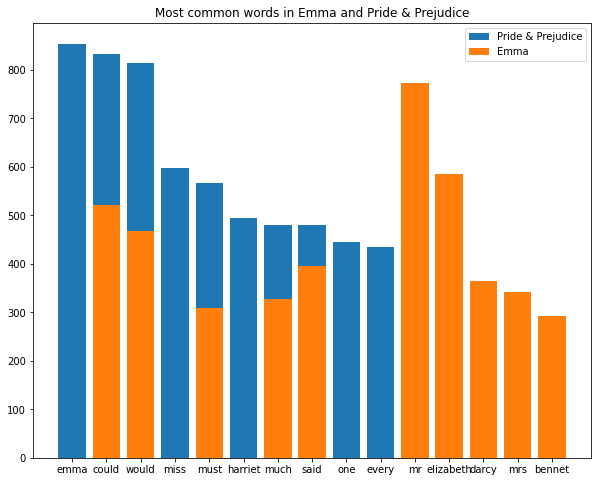

In [ ]:
# Create a bar graph overlay of the most common words from both texts

# get values for Emma
r = [] # create a list for x-axis values
s = [] # create a list for y-axis values

for (word, count) in emma_common[:10]: # iterate through the list of 10 most common words + their word counts
  r.append(word) 
  s.append(count)

# plot values, alongside those from Pride & Prejudice

Books = ['Pride & Prejudice', 'Emma']
plt.figure(figsize=(10, 8))
plt.bar(r, s)
plt.bar(x, y) # Recall that this is our plot of most common words in Pride & Prejudice
plt.title('Most common words in Emma and Pride & Prejudice')
plt.legend(Books,loc=1)
plt.show()


## Try this with your own text
In the space below, read, clean, and find the 10 most common words in the text you downloaded from Gutenberg. Create as many new code cells as you need. 

Feel free to tweak your stopwords lists to filter out words you don't find interesting.

Talk to your group about your findings.

(Tip: it's perfectly fine to open your txt file, scan your text visually to figure out what's going on with it, and even do some preliminary cleaning before you pull it into your Python environment. Just be sure you **save your text in plain text UTF-8 format**.)